![alt text](images/HDAT9500Banner.PNG)
<br>

# Chapter 4: Tree Based Methods

# Assessment: Random Forest

#####################################################################################

Double-click to write down your name and surname.

**Name:**
Alexander

**Surname:**
Kruskal

**Honour Pledge** <p>
    
    
Declaration: <p>
    
    
I declare that this assessment item is my own work, except where acknowledged, and has not been submitted for academic credit elsewhere or previously, or produced independently of this course (e.g. for a third party such as your place of employment) and acknowledge that the assessor of this item may, for the purpose of assessing this item: 

    a. Reproduce this assessment item and provide a copy to another member of the University; and/or 
    b. Communicate a copy of this assessment item to a plagiarism checking service (which may then retain a copy of the assessment item on its database for the purpose of future plagiarism checking). 

#####################################################################################

# 1. Introduction

In this exercise, we will introduce tree based methods. First, we will learn about the basic decision tree, then we will see how the performance of decision trees can be improved via ensemble methods - specifically, gradient descent boosting.


## 1.1. Aims of the Exercise:
 1. To introduce Random Forest.
 2. To explore parameters and determine appropriate choices.

 
It aligns with all of the learning outcomes of our course: 

1.	Distinguish a range of task specific machine learning techniques appropriate for Health Data Science.
2.	Design machine learning tasks for Health Data Science scenarios.
3.	Construct appropriate training and test sets for health research data.


## 1.2. Jupyter Notebook Intructions
1. Read the content of each cell.
2. Where necessary, follow the instructions that are written in each cell.
3. Run/Execute all the cells that contain Python code sequentially (one at a time), using the "Run" button.
4. For those cells in which you are asked to write some code, please write the Python code first and then execute/run the cell.
 
## 1.3. Tips
 1. The square brackets on the left hand side of each cell indicate whether the cell has been executed or not. Empty square brackets mean that the cell has not been executed, whereas square brackets that contain a number means that the cell has been executed. Run all the cells in sequence, using the "Run" button.
 2. To edit this notebook, just double-click in each cell. In the document, each cell can be a "Code" cell or "text-Markdown" cell. To choose between these two options, go to the combo-box above. 
 3. If you want to save your notebook, please make sure you press the "floppy disk" icon button above. 
 4. To clean the content of all cells and re-start the Notebook, please go to Cell->All Output->Clear

# 2. Load the liver patient dataset

Patients with liver disease have been continuously increasing because of excessive consumption of alcohol, inhalation of harmful gases, etc. <p>

This data set contains 416 liver patient records and 167 non liver patient records collected from North East of Andhra Pradesh, India. The "Dataset" column is a class label used to divide groups into liver patient (liver disease = 1) or not (no disease = 0). This data set contains 441 male patient records and 142 female patient records.<p>

Any patient whose age exceeded 89 is listed as being of age "90".<p>

Use these patient records to determine which patients have liver disease and which ones do not.<p>

Attribute Information:<p>
    1. Age: Age of the patient
    2. Gender: Gender of the patient
    3. Total_Bilirubin: Total Bilirubin
    4. Direct_Bilirubin: Direct Bilirubin
    5. Alkaline_Phosphatase: Alkaline Phosphatase
    6. Alanine_Aminotransferase: Alanine Aminotransferase
    7. Aspartate_Aminotransferase: Aspartate Aminotransferase
    8. Total_Proteins: Total Proteins
    9. Albumin: Albumin
    10. Albumin_and_Globulin_Ratio: Albumin and Globulin Ratio
    
Source: https://www.kaggle.com/arslanengr/liver-patient-classification-data-analysis/data

Journal Article: https://pdfs.semanticscholar.org/c92d/38a7a76c20a317de63fb9278bb10102c758b.pdf

### <font color='blue'> Question 1: What is the research question of this problem? (5 marks)</font>
<p><font color='green'> Tip: Read the journal article cited above </font></p>

<b> Write the answer here:</b>
#####################################################################################################################

Can a machine learning algorithm diagnose liver disease earlier than normally detected?


#####################################################################################################################

In [1]:
import sys
print(sys.version)

import numpy as np
import pandas as pd
from IPython.display import display

from plotnine import *

3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]


In [2]:
liver = pd.read_csv('data/liver-data/data_Clean.csv', sep=',')

In [3]:
# Sanity Check:
#display(liver[:][:5])
#print(liver.shape)

## 2.1.Split the data into features and response

In [4]:
X = liver.drop(['liver_patient'], axis = 1)
y = liver[['liver_patient']].values

In [5]:
# Sanity Check
#display(X[:][:5])

In [6]:
# Sanity Check
#display(y[0:10])

![alt text](images/ML-work-flow.PNG)

### <font color='blue'> Question 2 - Step 2 - Preparing Data: Visualise, explore and clean the data (if necessary). (20 marks)</font>

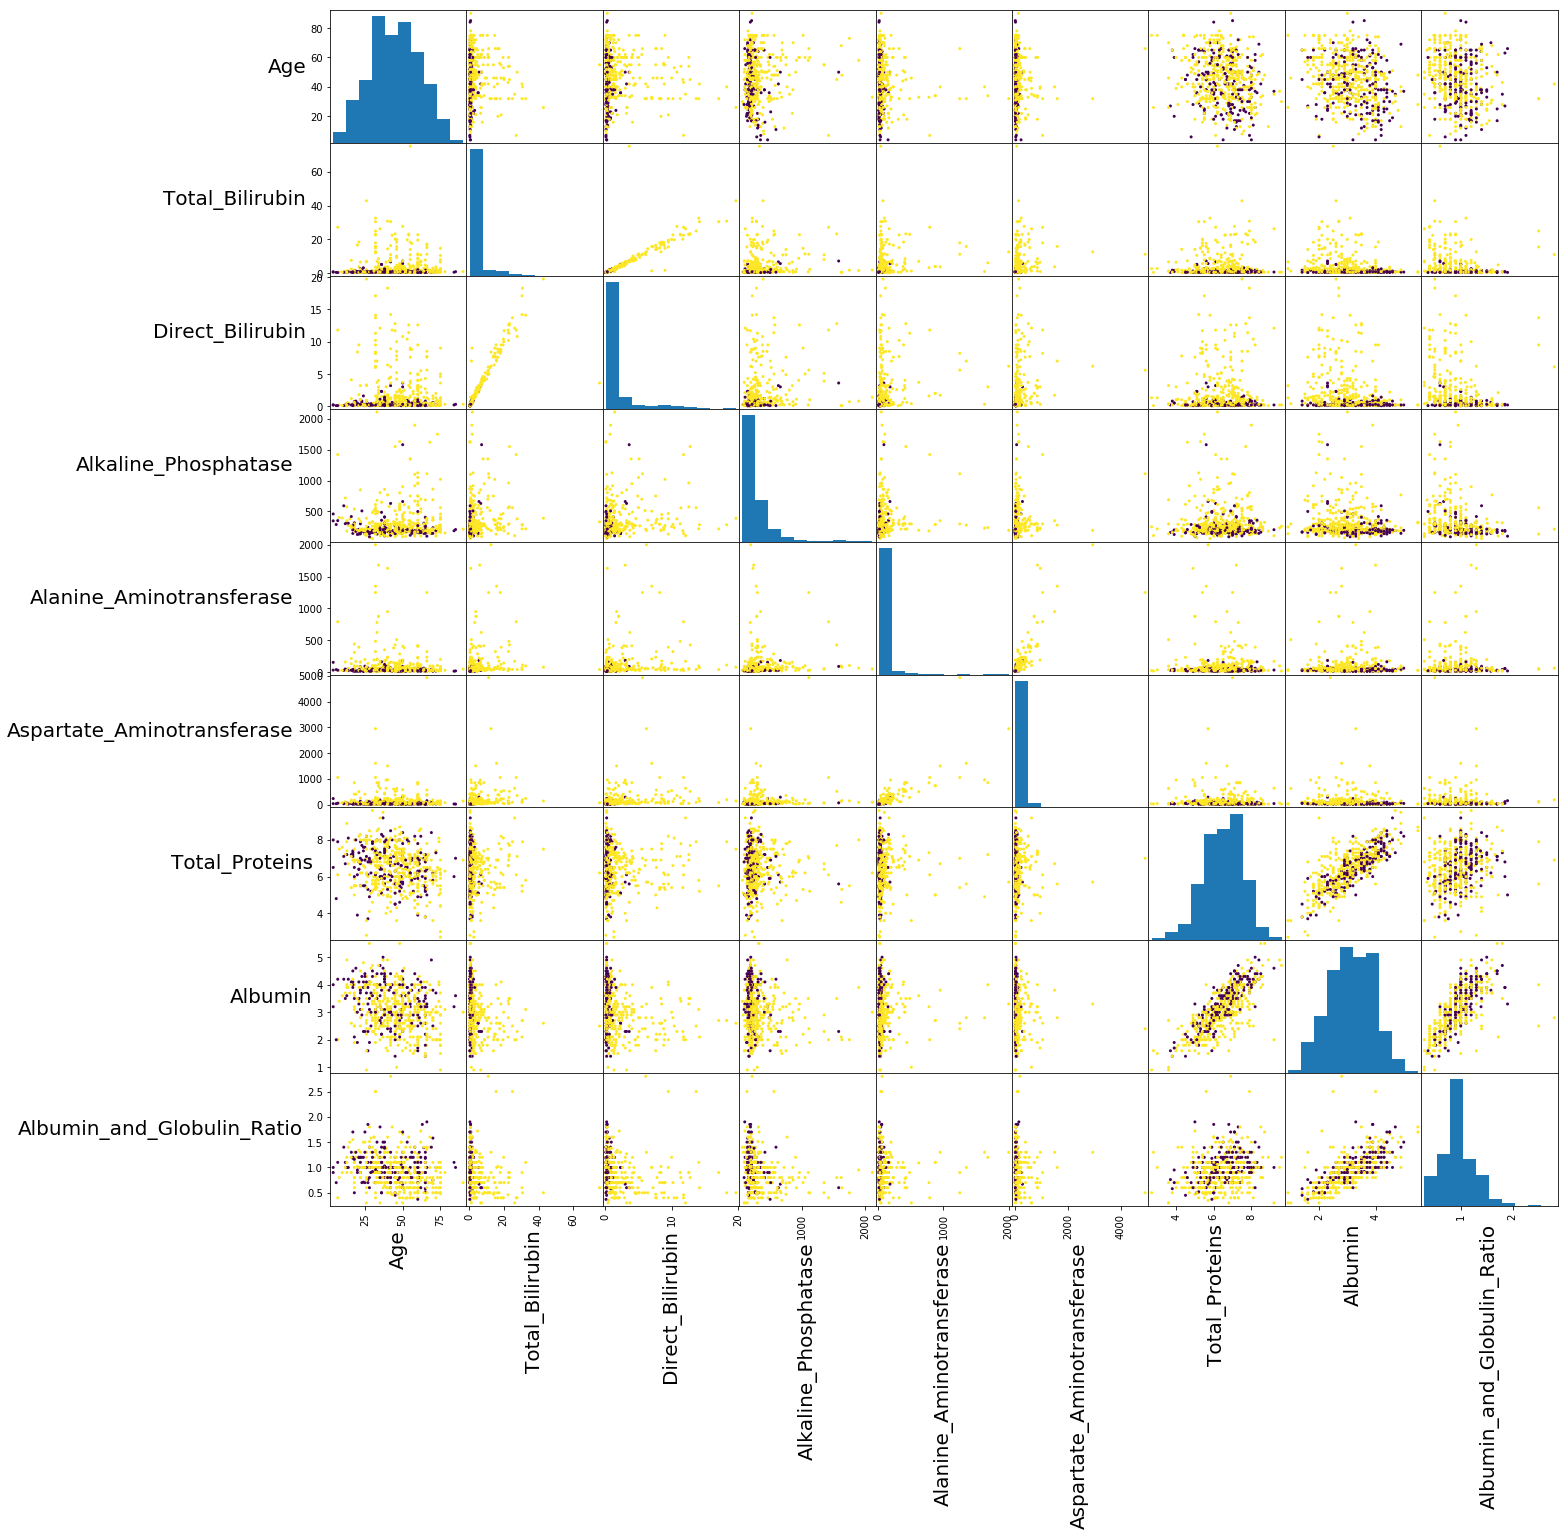

In [7]:
# Write Python code here:
# Minimum of 3 plots and 1 descriptive table
import matplotlib.pyplot as plt

# help: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.plotting.scatter_matrix.html
sm=pd.plotting.scatter_matrix(X.iloc[:, 0:31], c=liver.liver_patient, alpha=1, figsize=(22,22));

# Change labels and tickslabels sizes: 
# help: https://matplotlib.org/api/text_api.html#matplotlib.text.Text
#y ticklabels
a=[plt.setp(item.yaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#x ticklabels
b=[plt.setp(item.xaxis.get_majorticklabels(), 'size', 10) for item in sm.ravel()]
#y labels
c=[plt.setp(item.yaxis.get_label(), 'size', 20) for item in sm.ravel()]
#x labels
d=[plt.setp(item.xaxis.get_label(), 'size', 20) for item in sm.ravel()]

for ax in plt.gcf().axes:
    plt.sca(ax)
    plt.xlabel(ax.get_xlabel(), rotation=90)
    plt.ylabel(ax.get_ylabel(), rotation=0, horizontalalignment='right')








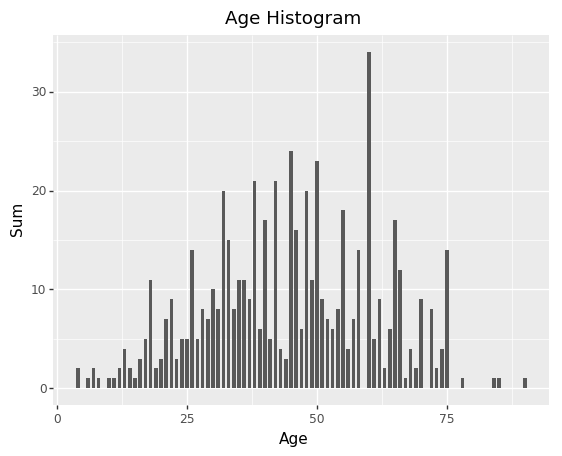

<ggplot: (105084244719)>


In [8]:
liver_age = ggplot(aes(x='Age', fill='liver_patient'), data=liver)
liver_age += geom_bar(aes(y = ('..count..')), width=0.7, position = 'dodge' )
liver_age += labs(title = 'Age Histogram', y = 'Sum')

print(liver_age)

C:\Users\akrus\Anaconda3\lib\site-packages\plotnine\positions\position.py:196: UserWarning: position_dodge requires non-overlapping x intervals
  warn(msg.format(cls.__name__))


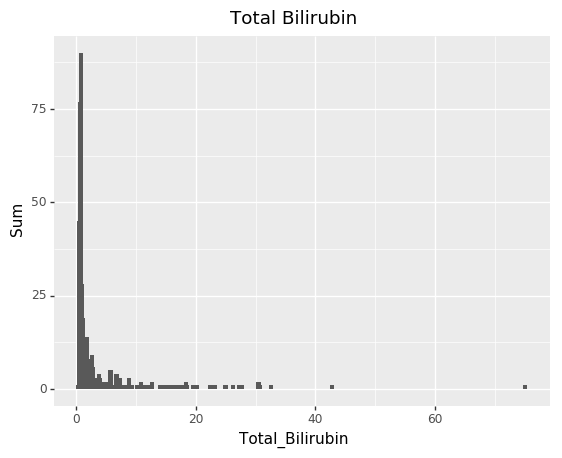

<ggplot: (-9223371931767765237)>


In [9]:
liver_tot_bil = ggplot(aes(x='Total_Bilirubin', fill='liver_patient'), data=liver)
liver_tot_bil += geom_bar(aes(y = ('..count..')), width=0.7, position = 'dodge' )
liver_tot_bil += labs(title = 'Total Bilirubin', y = 'Sum')

print(liver_tot_bil)

In [10]:
#Look for missing data
print(liver.isnull().sum())

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphatase          0
Alanine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Proteins                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
liver_patient                 0
dtype: int64


In [11]:
liver.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphatase            int64
Alanine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Proteins                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
liver_patient                   int64
dtype: object

In [12]:
liver.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphatase,Alanine_Aminotransferase,Aspartate_Aminotransferase,Total_Proteins,Albumin,Albumin_and_Globulin_Ratio,liver_patient
count,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000
mean,44.782383,3.315371,1.494128,291.366149,81.126079,110.414508,6.481693,3.138515,0.947064,0.715026
std,16.221786,6.227716,2.816499,243.561863,183.182845,289.850034,1.084641,0.794435,0.319592,0.451792
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,0.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,0.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,61.000000,87.000000,7.200000,3.800000,1.100000,1.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,1.000000


In [13]:
print(liver.describe(include=['object']))
print('***********************')
print(liver['Gender'].value_counts())
print('***********************')
print(liver['liver_patient'].value_counts())

       Gender
count     579
unique      2
top      Male
freq      439
***********************
Male      439
Female    140
Name: Gender, dtype: int64
***********************
1    414
0    165
Name: liver_patient, dtype: int64


## <font color='red'> Comment
There are no missing values but gender needs to be hot encoded.
No other clean up is obviously neccessary.

In [14]:
#hot encode Gender
dummies = pd.get_dummies(X['Gender'])

In [15]:
#Sanity Check:
#print(dummies.shape)
#print(dummies.columns)
#print(dummies)

In [16]:
X = X.join(dummies)

In [17]:
X = X.drop('Gender', axis =1)

In [18]:
#Sanity checks
#print(X.shape)
#print(X.columns)
#print(X["Male"].value_counts())
#print(X["Female"].value_counts())

## <font color='red'> Comment
Gender column removed and replaced by dummy variables, male and female

# 3. Predicting Liver Patient using Random Forests
In this section we will tune the parameters and eventually build a random forest to predict if a patient suffers from liver disease or not.

## 3.1. Parameters
Here are some of the more important parameters:

* n_estimators: Unlike Gradient Boosted Decision Trees, Random Forests *always* improve with an increased number of estimators, and there is no danger of overfitting. However, there are diminishing returns, with improvement quickly plateauing. The number of estimators are limited by our time and computational resources. <p>
* max_features: This is the number of features to consider when looking for the best split. max_features determines how random each tree is. A large max_features means the trees will be more similar, possibly allowing for overfitting. On the other hand, a smaller max_features reduces overfitting, but may force each tree to be very deep. For classification, it is common to use the default of max_features = $\sqrt {number\:of\:features}$.<p>
    
* class_weight: Random Forest has a parameter to penalise incorrect class labels differently. This is very useful for our imbalanced data.<p>
    
* max_depth: This parameter controls the maximum depth of the tree. If not specified, the nodes are expanded until all leaves are pure, or until all leaves contain less than min_samples_split samples.


## 3.2. Tuning our model
We will use a cross-validated grid search, using GridSearchCV.  

In [19]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
import warnings; warnings.simplefilter('ignore') #prevent warnings

The Random Forest algorithm allows categorical data to be used without creating dummies. Nevertheless, the scikit-learn library in Python needs all the variables to be numeric. Therefore, our categorical variables must be converted to dummy variables.


Some readings:
1. https://towardsdatascience.com/random-forest-in-python-24d0893d51c0
2. https://datascience.stackexchange.com/questions/26283/how-can-i-fit-categorical-data-types-for-random-forest-classification

![alt text](images/ML-work-flow.PNG)

**Build a Random Forest Classifier to predict if a patient is a liver patient or not. (Step 3: Choosing a model)**

<p><font color='green'>Tips:
1. Follow the template of the second part of Exercise 1. In Exercise 1, we searched the best parameters in two rounds. Do only one round here, but tune the grid as many times as you need. You can give an explanation of the tuning that you followed in the space provided below.
    2. Pay attention to the categorical variables.</p>

### <font color='blue'> Question 3 - Step 4 + Step 6 Training/Fit the model + Hyperparameter Tuning: Define and run the GridSearchCV to find the best 'max_features', 'max_depth' and 'n_estimators'. Train the model. (25 marks)</font>

In [20]:
# Write Python code here:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0, test_size = 0.20)

In [21]:
rft_gridsearch = RandomForestClassifier(random_state=0, class_weight = 'balanced')

In [22]:
param_grid = {'n_estimators': [25, 50, 75, 100],
              'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,9, 10]}

In [23]:
grid_search = GridSearchCV(rft_gridsearch, param_grid=param_grid, cv=5, scoring = 'f1')

In [24]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_estimators': [25, 50, 75, 100], 'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='f1', verbose=0)

### <font color='blue'> Question 4 - Step 5 Evaluation: Assess the classifier in the test set: accuracy, f1 score, f1_macro, precision, recall, and AUC/ROC. (20 marks)</font>

In [25]:
# Write Python code here:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation average f1 score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 8, 'max_features': 1, 'n_estimators': 25}
Best cross-validation average f1 score: 0.81


In [26]:
#print("Test set F1: {:.2f}".format(grid_search.score(X_test, y_test)))

Accuracy on test set: 0.66
f1_macro on test set: 0.62
ROC/AUC score on test set: 0.63
********************************
Classification Report

             precision    recall  f1-score   support

          0       0.43      0.55      0.48        33
          1       0.80      0.71      0.75        83

avg / total       0.69      0.66      0.67       116

********************************
Confusion Matrix

[[59 24]
 [15 18]]


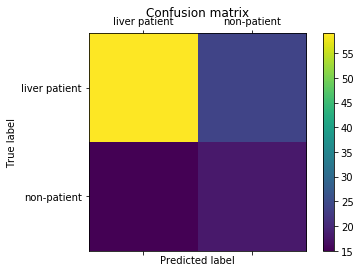

In [27]:
# Let's predict in the training set, in order to calculate accuracy in the train set too, to see if our model is overfitted.
y_pred_grid_search_training_set= grid_search.predict(X_train)

# We predict in the test set
y_pred_grid_search = grid_search.predict(X_test)


from sklearn.metrics import accuracy_score
print("Accuracy on test set: {:.2f}".format(accuracy_score(y_test, y_pred_grid_search)))

from sklearn.metrics import f1_score
print("f1_macro on test set: {:.2f}".format(f1_score(y_test, y_pred_grid_search, average = 'macro')))

from sklearn.metrics import roc_auc_score
print("ROC/AUC score on test set: {:.2f}".format(roc_auc_score(y_test, y_pred_grid_search, average = 'macro')))

print('********************************')
print('Classification Report')
print('')
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_grid_search))

print('********************************')
print('Confusion Matrix')
print('')
from sklearn.metrics import confusion_matrix
cm_grid_search = confusion_matrix(y_true = y_test, y_pred = y_pred_grid_search, labels = [1,0])
print(cm_grid_search)

# Show confusion matrix in a separate window
labels = ['liver patient', 'non-patient']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm_grid_search)
plt.title('Confusion matrix')
plt.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## <font color='red'> Comment
   ###### On the test data:
   Accuracy: .66  
   Precision: .80   
   ROC/AUC: .63  
   Recall: .71  
   f1_score: .75  
   f1_macro: .62  
   
    

### <font color='blue'> Question 5 - Step 8 Interpretation: Display feature importance. (10 marks)</font>


## Set up

In [28]:
# fit model with best parameters for f1 score
best_rft = RandomForestClassifier(random_state=0, max_depth = 8, max_features = 1, n_estimators = 25, class_weight = 'balanced')
best_rft.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=8, max_features=1,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=25, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [29]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X.columns) 
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")

## Display Feature Importance

In [30]:
print("Feature importances:\n{}".format(best_rft.feature_importances_))

Feature importances:
[0.0973703  0.11239668 0.10616163 0.15155551 0.11901845 0.15012552
 0.08520114 0.08323003 0.08144237 0.00653902 0.00695937]


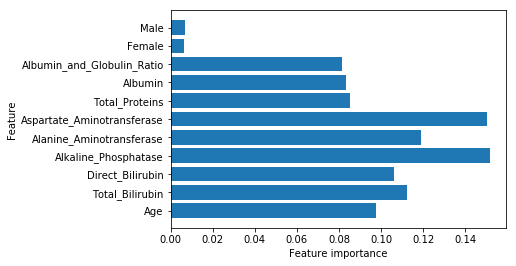

In [31]:
plot_feature_importances(best_rft)

### <font color='blue'> Question 6 - Step 9 Deployment: Would you use this classifier? (20 marks)</font>


<b> Parameters Tuning:</b>
#####################################################################################################################

I would not use this classifier.

The main problem with this model is that there are too many false negatives (people who are predicted to not have liver disease, but in fact do).

This is reflected in the summary report with the precision of the negative being .43 and recall of the negative being .55.  
The relatively high percentage of false positives would probably be ok for the model if it were not for the many false negatives.


#####################################################################################################################